In [1]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from array import array
import numpy as np
import math
import pandas as pd
plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X = pd.read_excel(open('/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls', 'rb'), sheet_name='A - aaup')['A7'].to_numpy()
Y = pd.read_excel(open('/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls', 'rb'), sheet_name='A - aaup')['A8'].to_numpy()

n1 = len(X)
n2 = len(Y)
print(n1, n2)

1073 1073


In [3]:
ans = sps.wilcoxon(X, Y)
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

Sign test: z = 78.000, p-value = 0.000


In [4]:
k = 1 + int(math.log(n1, 2))
print("Число групп по формуле Стерджесса : {k}".format(k = k))
print("Ширина интервалов : {z}".format(z = (max(X)-min(X))/k))

Число групп по формуле Стерджесса : 11
Ширина интервалов : 34.27272727272727


In [78]:
59+15+12

86

In [79]:
arr1 = np.array([27, 262, 467, 256, 50, 12])
arr2 = np.array([101, 260, 306, 187, 134, 86])

In [80]:
ans = sps.chi2_contingency([arr1, arr2]) #вручную убрал частоты <= 5
print('Сhi-squared test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

Сhi-squared test: z = 181.294, p-value = 0.000


In [15]:
Y = np.append(Y, X.min())

In [16]:
X = np.append(X, Y.max())

In [69]:
n1 = len(X)
k = 1 + int(math.log(n1, 2))
print("Число групп по формуле Стерджесса : {k}".format(k = k))
print("Ширина интервалов : {z}".format(z = (max(X)-min(X))/k))

Число групп по формуле Стерджесса : 11
Ширина интервалов : 60.63636363636363


[27, 262, 467, 256, 50, 10, 1, 0, 0, 0, 1]
[3, 98, 260, 306, 187, 134, 59, 15, 7, 3, 2]
[0.03, 0.24, 0.43, 0.24, 0.05, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.09, 0.24, 0.29, 0.17, 0.12, 0.05, 0.01, 0.01, 0.0, 0.0]
[199, 259, 320, 380, 441, 502, 562, 623, 684, 744, 805, 866]
[199, 259, 320, 380, 441, 502, 562, 623, 684, 744, 805, 866]


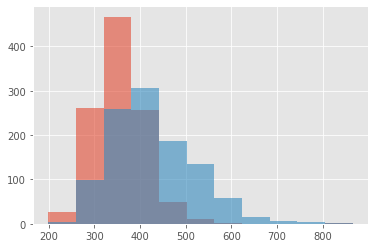

In [73]:
result = plt.hist(X,  bins=11, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_X = result[0]
values_X = result[1]
result = plt.hist(Y,  bins=11, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_Y = result[0]
values_Y = result[1]
relative_freq_X = []
relative_freq_Y = []

for i in range(len(frequencies_X)):
    relative_freq_X.append(round(frequencies_X[i]/n1, 2))
    relative_freq_Y.append(round(frequencies_Y[i]/n2, 2))
print([int(item) for item in frequencies_X])
print([int(item) for item in frequencies_Y])
print(relative_freq_X)
print(relative_freq_Y)
#print(sum(relative_freq_X)) для проверки 
#print(sum(relative_freq_Y)) что сумма относительных частот 1 

print([int(item) for item in values_X])
print([int(item) for item in values_Y])



In [74]:
ans = sps.chi2_contingency([[27, 262, 467, 256, 50, 12], [101, 260, 306, 187, 134, 59, 15, 12]]) #вручную убрал частоты <= 5
print('Сhi-squared test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


TypeError: ignored

In [52]:
d = {'A7':X}
sample1 = pd.DataFrame(data = d)

In [54]:
d = {'A8':Y}
sample2 = pd.DataFrame(data = d)

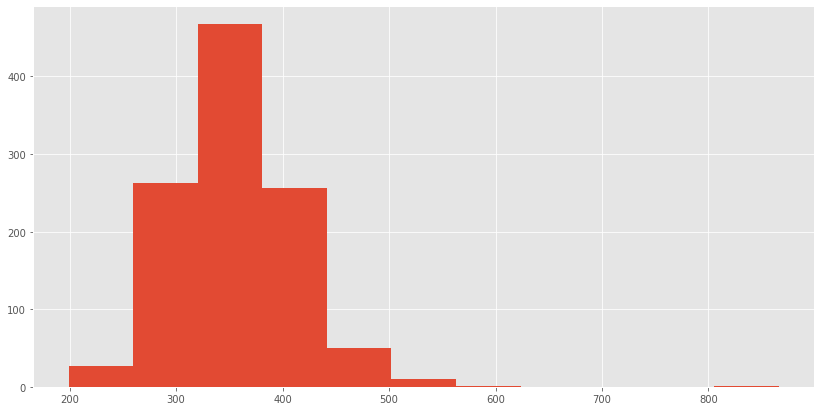

In [63]:
plt.figure(figsize=(14,7))

count,division = np.histogram(sample1['A7'], bins=11)
ar1 = []
for i in range(len(division)-1):
  ar1.append(((division[i + 1] - division[i]) / 2) + division[i])

sample1['A7'].hist(bins=11, density=False)

count,division = np.histogram(sample2['A8'], bins=11)
ar2 = []
for i in range(len(division)-1):
  ar2.append(((division[i + 1] - division[i]) / 2) + division[i])


<BarContainer object of 11 artists>

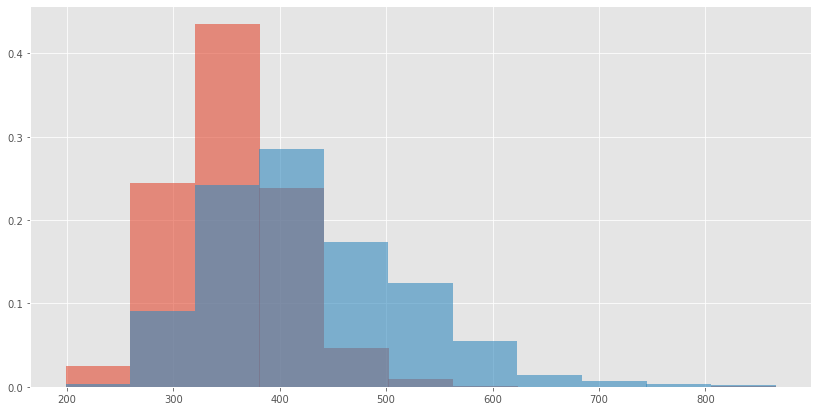

In [68]:
plt.figure(figsize=(14,7))
y1 = pd.cut(sample1['A7'], bins=11).value_counts(sort=False, normalize = True).values
plt.bar(ar1, y1, width = 61, alpha=0.6)

y2 = pd.cut(sample2['A8'], bins=11).value_counts(sort=False, normalize = True).values
plt.bar(ar2, y2, width = 60.7, alpha=0.6,)